<a href="https://colab.research.google.com/github/Michal-Janulewski/Formula_1_Python/blob/main/Formula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import openpyxl as openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

drivers = pd.read_excel("drivers.xlsx")
circuits = pd.read_excel("circuits.xlsx")
constructor = pd.read_excel("constructors.xlsx")
results = pd.read_excel("results.xlsx").rename(columns={"Pole Position": "Pole_Position"})
races = pd.read_excel("races.xlsx")
season = pd.read_excel("seasons.xlsx")
status = pd.read_excel("status.xlsx")

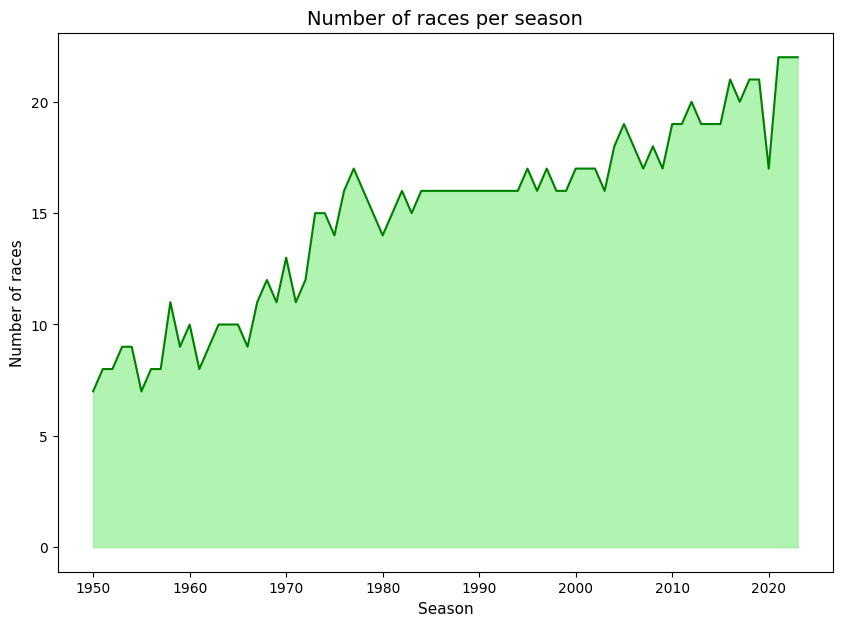

In [4]:
races_per_season = pd.DataFrame(races.groupby("Year")["Race_Id"].count())\
                    .rename(columns={"Race_Id": "Races_Num"})

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(races_per_season.index, races_per_season["Races_Num"], color="green")

ax.set_xlabel("Season", fontsize=11)
ax.set_ylabel("Number of races", fontsize=11)
ax.set_title("Number of races per season", fontsize=14)
ax.fill_between(races_per_season.index, races_per_season["Races_Num"],
                alpha=0.7, color="lightgreen")

plt.show()

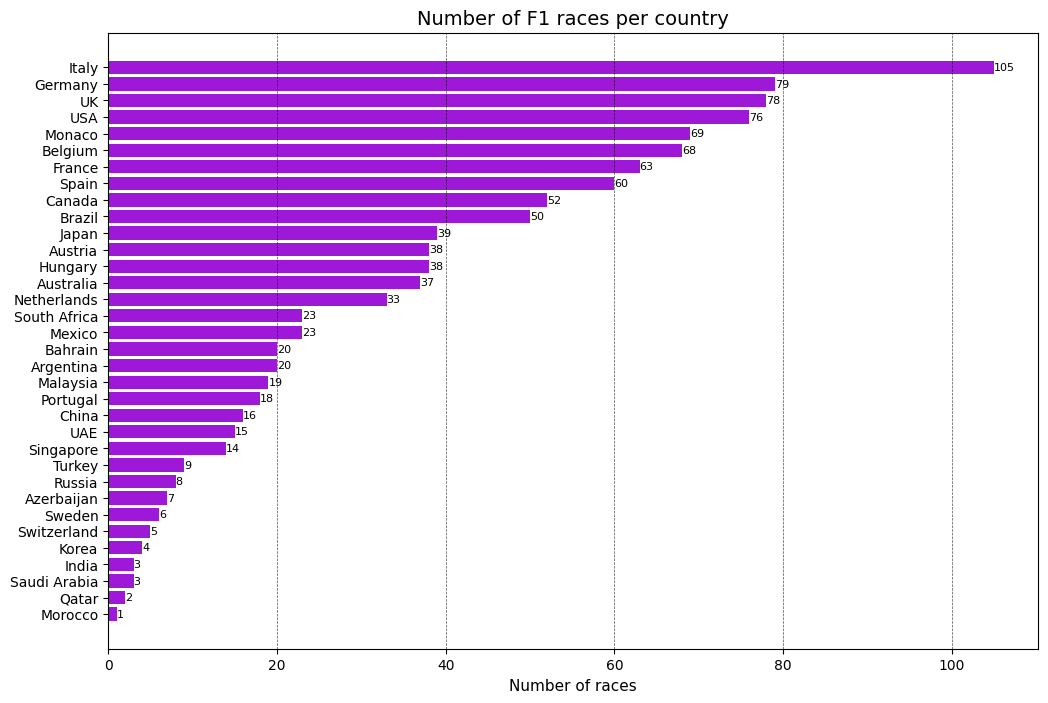

In [5]:
races_per_country = circuits.merge(races, left_on="Circuit_ID",
                                   right_on="Circuit_Id", how="inner")

races_per_country_sort = pd.DataFrame(races_per_country.groupby("Country")["Race_Id"] \
                                      .count()).sort_values("Race_Id") \
    .rename(columns={"Race_Id": "Number of races"})

fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(races_per_country_sort.index, races_per_country_sort["Number of races"],
        height=0.8, color="darkviolet", alpha=0.9)

ax.set_xlabel("Number of races", fontsize=11)
ax.set_title("Number of F1 races per country", fontsize=14)

ax.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.7, color="black")
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=8, color="black")

plt.show()

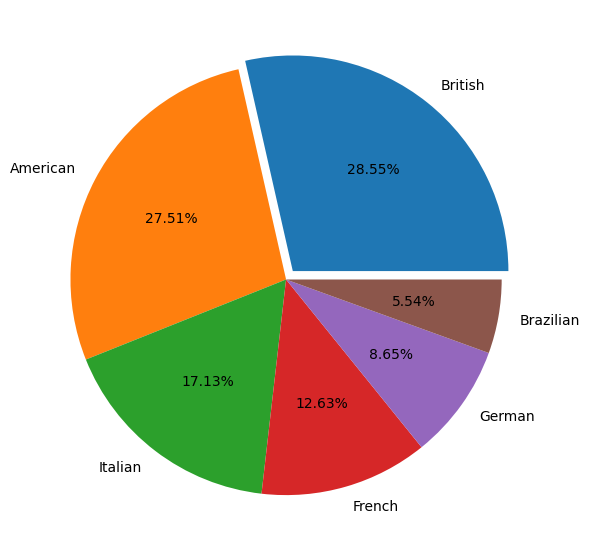

In [6]:
drivers_by_country = pd.DataFrame(drivers.groupby("Nationality")["Driver_Id"] \
                                 .count()).rename(columns={"Driver_Id": "Num of drivers"})\
                                 .sort_values("Num of drivers", ascending=False)

all_drivers = drivers_by_country["Num of drivers"].sum()
drivers_by_country_percent = pd.DataFrame(drivers_by_country["Num of drivers"] / all_drivers * 100)\
                              .rename(columns={"Num of drivers": "Percent of all drivers"})

top_6_nationality = drivers_by_country_percent.nlargest(columns="Percent of all drivers", n=6)

fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(top_6_nationality["Percent of all drivers"],
       labels = top_6_nationality.index,
       explode = (0.050,0,0,0,0,0),
       autopct = "%1.2f%%")

plt.show()

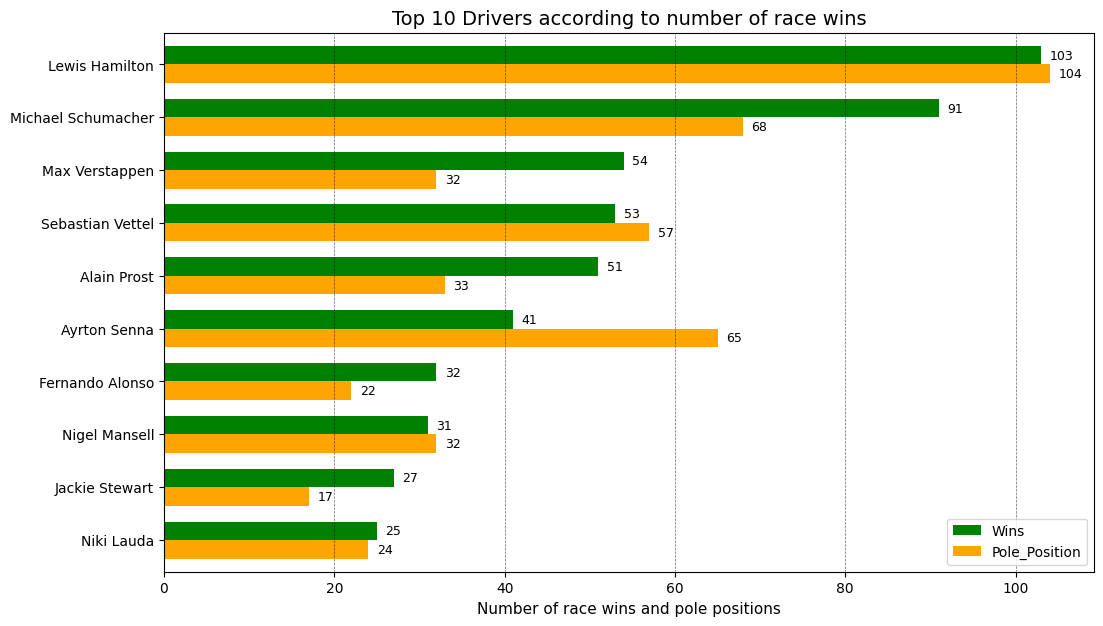

In [7]:
driver_res = results.merge(drivers, on="Driver_Id")

PP_Wins_by_driver = pd.DataFrame(driver_res.groupby("Name")[["Wins", "Pole_Position"]]\
                                 .count()).sort_values("Wins", ascending=False).head(10)

fig, ax = plt.subplots(figsize = (12,7))

PP_Wins_by_driver.plot(kind="barh", ax=ax, color=["green", "orange"], width=0.7)
ax.set_xlabel("Number of race wins and pole positions", fontsize=11)
ax.set_ylabel("")
ax.set_title("Top 10 Drivers according to number of race wins", fontsize=14)

ax.invert_yaxis()

ax.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6, color="black")

for i in ax.patches:
    plt.text(i.get_width()+1, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize=9, color='black')

plt.show()

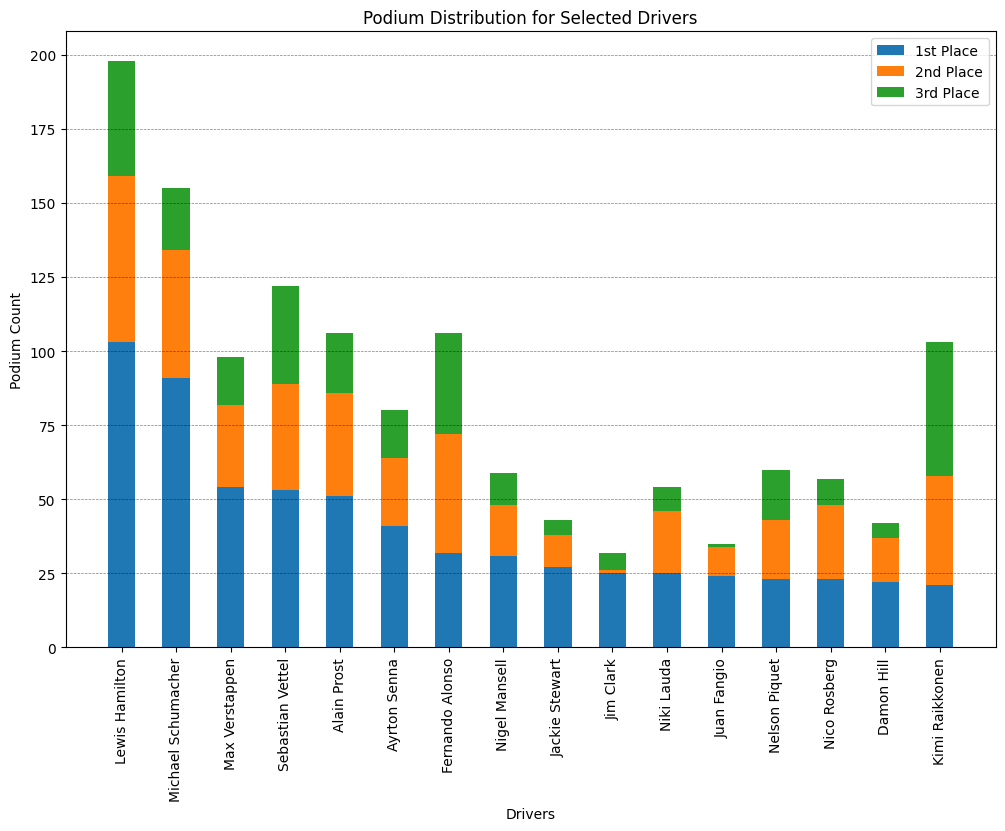

In [8]:
driver_podiums = drivers.merge(results, on="Driver_Id")
driver_podiums = driver_podiums[["Name", "Position"]]
driver_podiums_group = driver_podiums.groupby(["Name", "Position"]).size().reset_index(name='Position_Count')

filtered_drivers = driver_podiums_group.query("Position == 1 and Position_Count > 20")
drivers_name = filtered_drivers["Name"]

podium = [1, 2, 3]
podium_distribution = driver_podiums_group.query("Name in @drivers_name and Position in @podium")

plotdata = pd.DataFrame(columns=["1stPlace", "2ndPlace", "3rdPlace"])

for position in podium:
    position_data = podium_distribution[podium_distribution["Position"] == position].set_index("Name")

    if position == 1:
        plotdata["1stPlace"] = position_data["Position_Count"]
    elif position == 2:
        plotdata["2ndPlace"] = position_data["Position_Count"]
    elif position == 3:
        plotdata["3rdPlace"] = position_data["Position_Count"]

plotdata = plotdata.sort_values("1stPlace", ascending = False)

plt.figure(figsize=(12, 8))

plt.bar(plotdata.index, plotdata["1stPlace"], width=0.5, align='center',
        label='1st Place')
plt.bar(plotdata.index, plotdata["2ndPlace"], width=0.5, align='center',
        label='2nd Place', bottom=plotdata["1stPlace"])
plt.bar(plotdata.index, plotdata["3rdPlace"], width=0.5, align='center',
        label='3rd Place', bottom=plotdata["1stPlace"] + plotdata["2ndPlace"])

plt.xticks(plotdata.index, rotation=90)
plt.xlabel('Drivers')
plt.ylabel('Podium Count')
plt.title('Podium Distribution for Selected Drivers')
plt.legend()
plt.grid(axis = "y", linestyle = "--", linewidth = 0.5, alpha = 0.5, color = "black")

plt.show()

<ipython-input-9-8df21564c6e4>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(driver_avg["Name"], rotation = 30)


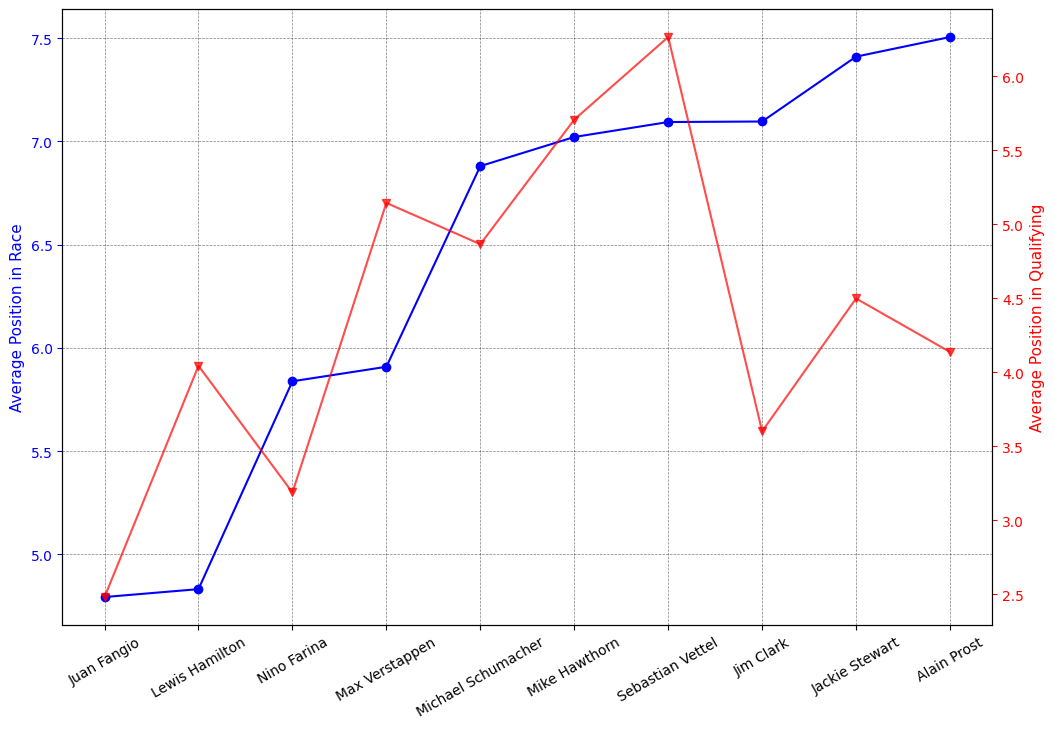

In [9]:
driver_result = results.merge(drivers, on="Driver_Id")

driver_result = driver_result[["Grid", "Position", "Points", "Name"]]

driver_result_2 = pd.DataFrame(driver_result.groupby("Name")["Position"]
                               .count().sort_values(ascending=False)
                               .reset_index().rename(columns={"Position": "Num_races"}))

driver_with_25_races = driver_result_2[driver_result_2["Num_races"] > 25]

driver_with_25_races_v2 = driver_result.merge(driver_with_25_races,
                                              on="Name", how="inner")

driver_avg = driver_with_25_races_v2.groupby("Name", as_index=False)[["Grid", "Position"]]\
              .mean().sort_values("Position").head(10)

fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(driver_avg["Name"], driver_avg["Position"], color = "blue",
        marker = "o")
ax.set_ylabel("Average Position in Race", color = "blue", fontsize = 11)
ax.tick_params('y', colors = "blue")

ax2 = ax.twinx()
ax2.plot(driver_avg["Name"], driver_avg["Grid"], color = "red",
         marker = "v", alpha = 0.7)
ax2.set_ylabel("Average Position in Qualifying", color = "red", fontsize = 11)
ax2.tick_params("y", colors = "red")

ax.set_xticklabels(driver_avg["Name"], rotation = 30)
ax.grid(linestyle='--', linewidth=0.5, alpha=0.5, color='black')

plt.show()

In [10]:
driver_result = results.merge(drivers, on="Driver_Id")

driver_result_v2 = driver_result[["Grid", "Position", "Points", "Name"]]

correlation = driver_result_v2['Grid'].corr(driver_result_v2['Position'])

print(f"Korelacja pomiędzy wartościami 'Grid' i 'Position': {correlation}")

Korelacja pomiędzy wartościami 'Grid' i 'Position': 0.1592793189110969


In [11]:
driver_result = results.merge(drivers, on="Driver_Id")

driver_result= driver_result[["Grid", "Position", "Points", "Name"]]

driver_result_v3 = pd.DataFrame(driver_result.groupby("Name")["Position"].count().sort_values(ascending=False)
                                .reset_index().rename(columns={"Position": "Num_races"}))

driver_with_25_races = driver_result_v3[driver_result_v3["Num_races"] > 25]

driver_with_25_races_v2 = driver_result.merge(driver_with_25_races, on="Name", how="inner")

driver_correlations = driver_with_25_races_v2.groupby('Name').apply(lambda x: x['Grid']
                                                                    .corr(x['Position'])).reset_index()
driver_correlations_sort = driver_correlations.rename(columns={0: "Correlation"})\
    .sort_values("Correlation", ascending=False)

print(driver_correlations_sort)

                  Name  Correlation
78   Heikki Kovalainen     0.651267
225         Timo Glock     0.571868
23         Bruno Senna     0.565601
4       Alberto Ascari     0.560367
130       Louis Rosier     0.546957
..                 ...          ...
20        Brian Henton    -0.809980
238     Yannick Dalmas    -0.831966
192        Raul Boesel    -0.832616
64   Gabriele Tarquini    -0.838046
16     Bernd Schneider    -0.847489

[240 rows x 2 columns]


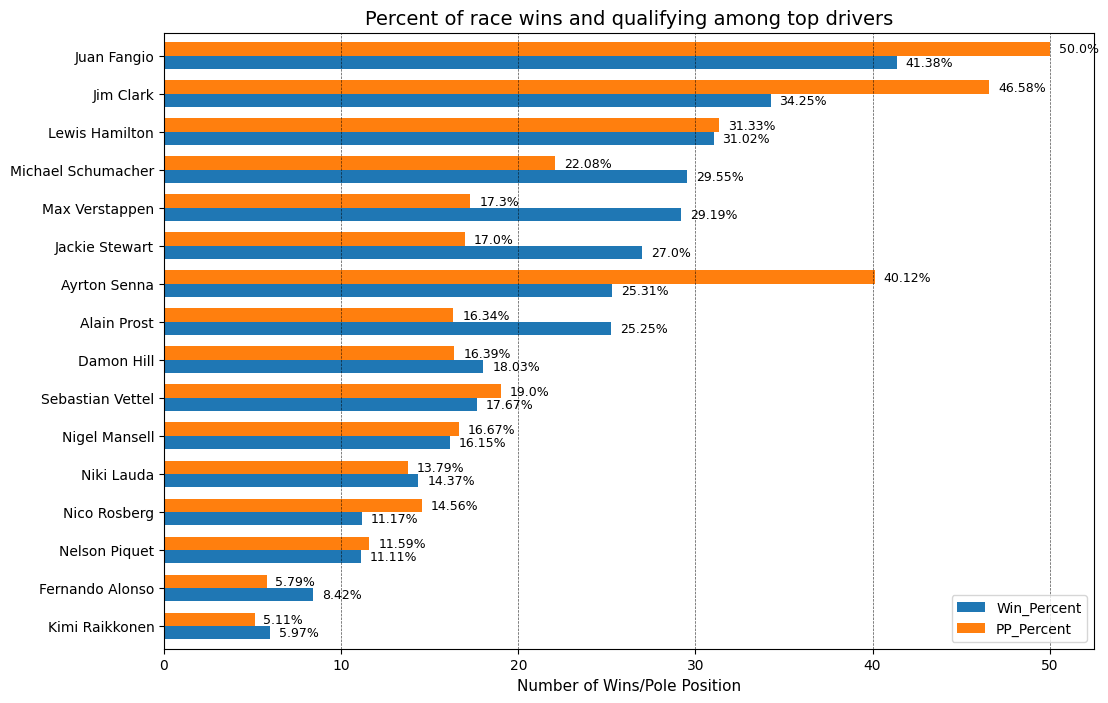

In [12]:
result_drivers = results.merge(drivers, on="Driver_Id")
result_drivers = result_drivers[["Result_Id", "Wins", "Pole_Position", "Name"]]

results_dr_gr = result_drivers.groupby("Name").agg({
    "Wins": "sum",
    "Pole_Position": "sum",
    "Result_Id": "count"
}).rename(columns={"Result_Id": "Total_Races"})\
    .query("Wins > 20 and Pole_Position > 15")

results_dr_gr["Win_Percent"] = results_dr_gr["Wins"] / results_dr_gr["Total_Races"] * 100
results_dr_gr["PP_Percent"] = results_dr_gr["Pole_Position"] / results_dr_gr["Total_Races"] * 100

driver_Win_and_PP_percent = results_dr_gr.drop(["Wins", "Pole_Position", "Total_Races"], axis = 1)\
                            .sort_values("Win_Percent")

fig, ax = plt.subplots(figsize = (12, 8))

driver_Win_and_PP_percent.plot(kind = "barh", ax = ax, width = 0.7)
ax.set_xlabel("Number of Wins/Pole Position", fontsize = 11)
ax.set_ylabel("")
ax.set_title("Percent of race wins and qualifying among top drivers", fontsize = 14)

ax.grid(axis = "x", linestyle = "--", linewidth = 0.5, alpha = 0.7, color = "black")

for i in ax.patches:
    plt.text(i.get_width() + 0.5, i.get_y()+0.07,
             f'{round(i.get_width(), 2)}%',
             fontsize=9, color='black')

plt.show()

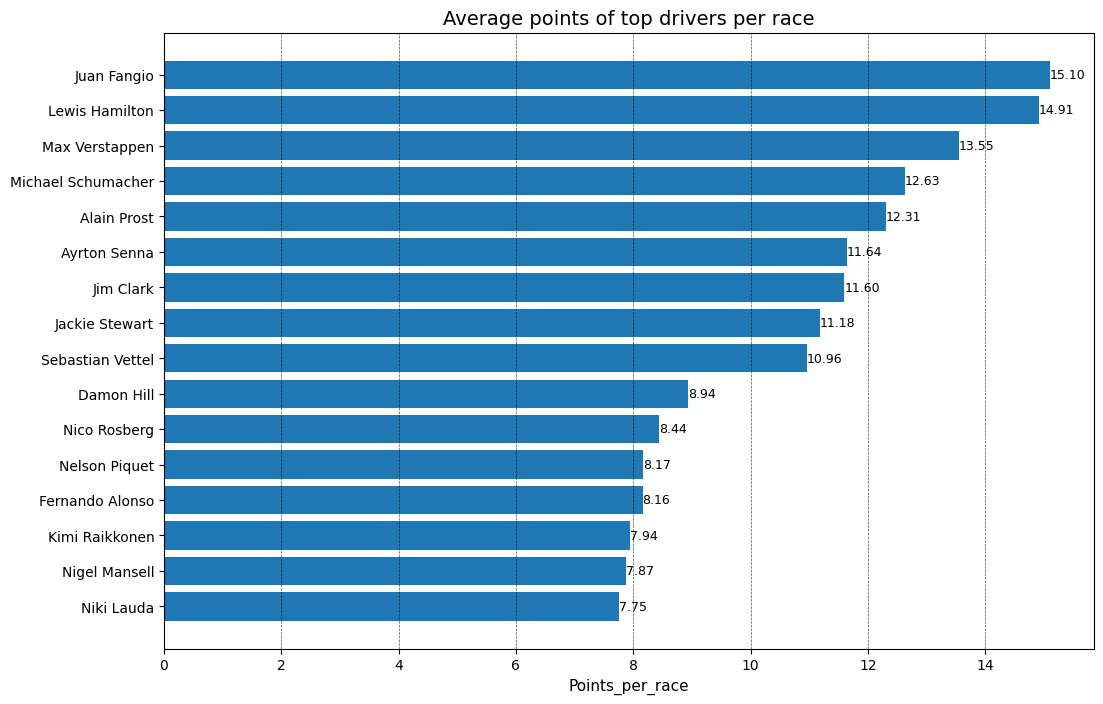

In [13]:
driver_result = results.merge(drivers, on="Driver_Id")

driver_result = driver_result[["Points", "Name", "Result_Id", "Wins"]]

driver_result_agg = driver_result.groupby("Name").agg({
    "Points": "sum",
    "Wins": "sum",
    "Result_Id": "count"
}).rename(columns={"Result_Id": "Total_Races"}).query("Wins > 20")

driver_result_agg["Points_per_race"] = round(driver_result_agg["Points"] / driver_result_agg["Total_Races"], 2)
driver_result_agg = driver_result_agg.drop(["Wins", "Total_Races", "Points"], axis = 1)\
                .sort_values("Points_per_race", ascending = False)

driver_result_agg

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(driver_result_agg.index, driver_result_agg["Points_per_race"])
ax.set_xlabel("Points_per_race", fontsize = 11)
ax.set_title("Average points of top drivers per race", fontsize = 14)

ax.grid(axis = "x", linestyle = "--", linewidth = 0.5, alpha = 0.7, color = "black")
plt.bar_label(ax.containers[0], fmt='%.2f', fontsize=9, color="black")
ax.invert_yaxis()

plt.show()


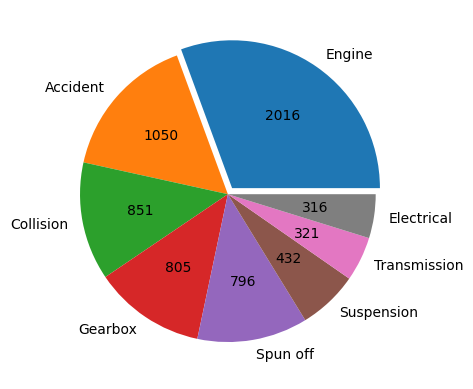

In [14]:
DNF_2= status[status["Status"].str.contains('Lap|Finished|Did not qualify|Did not prequalify')]

dnf_3 = pd.concat([status, DNF_2]).drop_duplicates(keep=False)

DNF = dnf_3.merge(results, on="Status_Id").groupby("Status")["Status_Id"]\
    .count().sort_values(ascending=False).reset_index().head(8)

num = DNF["Status_Id"]
Type = DNF["Status"]

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total/100,0))
        return '{v:d}'.format(v=val)
    return my_format

plt.pie(num,
       labels = Type,
       explode = (0.050,0,0,0,0,0,0,0),
       autopct = autopct_format(num))

plt.show()

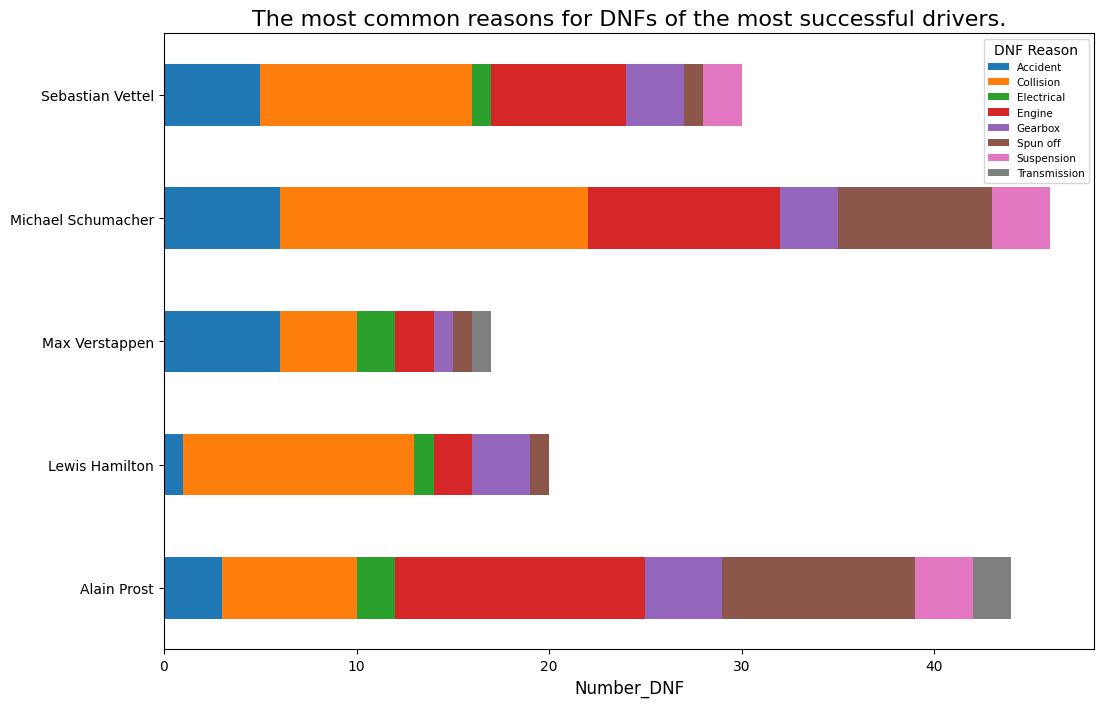

In [15]:
driver_results = results.merge(drivers, on='Driver_Id')

# Liczenie liczby zwycięstw dla 5 najlepszych kierowców, następnie połączenie otrzymanego df z 'drivers', 'results' i 'status'
Top_5_driver = pd.DataFrame(driver_results.groupby('Driver_Id')['Wins'].count().sort_values(ascending=False).head(5))\
    .merge(drivers, on="Driver_Id").merge(results, on="Driver_Id").merge(status, on="Status_Id")

# Filtrowanie'Top_5_driver' tylko dla statusów 'Lap','Finished' i 'Did not qualify'
Not_DNF = Top_5_driver[Top_5_driver['Status'].str.contains('Lap|Finished|Did not qualify|Did not prequalify')]

# Filtrowanie wyników, które nie zawierają statusów 'Lap','Finished' i 'Did not qualify'
DNF = pd.concat([Top_5_driver, Not_DNF]).drop_duplicates(keep=False)

# Grupowanie wyników ze względu na 'Name' i 'Status', liczenie według 'Result_Id'
DNF_GROUP = DNF.groupby(['Name', 'Status'])['Result_Id'].count()

# Wybór wartości "Not_DNF" z df 'status'
Not_DNF_2 = status[status["Status"].str.contains('Lap|Finished|Did not qualify|Did not prequalify')]

# Wybór wartości, 'DNF' z df 'status'
DNF_2 = pd.concat([status, Not_DNF_2]).drop_duplicates(keep=False)

# Łączenie df 'DNF_2' z 'results' na podstawie 'Status_Id' i grupowanie według "Status"
DNF_v2 = DNF_2.merge(results, on="Status_Id").groupby("Status")["Status_Id"]\
    .count().sort_values(ascending=False).reset_index().head(8)

# Wybór statusów z df 'DNF, które są zawarte również w df 'DNF_2
DNF_Filter = DNF[DNF['Status'].isin(DNF_v2['Status'])]

# Grupowanie według 'Name' i 'Status', a następnie liczenie według 'Result_Id'
DNF_Final = DNF_Filter.groupby(['Name', 'Status'])['Result_Id'].count()

# Tworzenie wykresu
fig, ax = plt.subplots(figsize = (12,8))
DNF_Final.unstack().plot.barh(stacked=True, ax=ax)
plt.xlabel("Number_DNF", fontsize=12)
plt.ylabel("")
plt.title("The most common reasons for DNFs of the most successful drivers.", fontsize=16)
plt.legend(title="DNF Reason", fontsize=7.5)
plt.show()

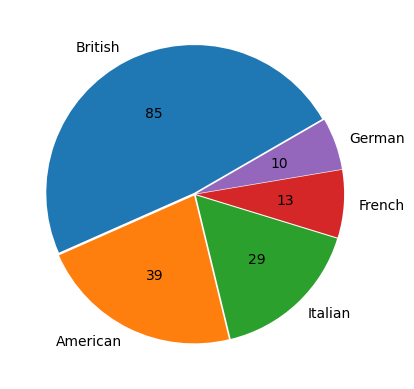

In [16]:
team_nationality = constructor.groupby("Nationality")["Constructor_Id"].count().sort_values(ascending=False) \
    .head(5).reset_index()

Nationality = team_nationality["Nationality"]
Num_Constructor = team_nationality["Constructor_Id"]


def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100, 0))
        return '{v:d}'.format(v=val)
    return my_format


plt.pie(Num_Constructor,
        labels=Nationality,
        startangle=30,
        explode=(0.010, 0.010, 0.010, 0.010, 0.010),
        autopct=autopct_format(Num_Constructor))

plt.show()

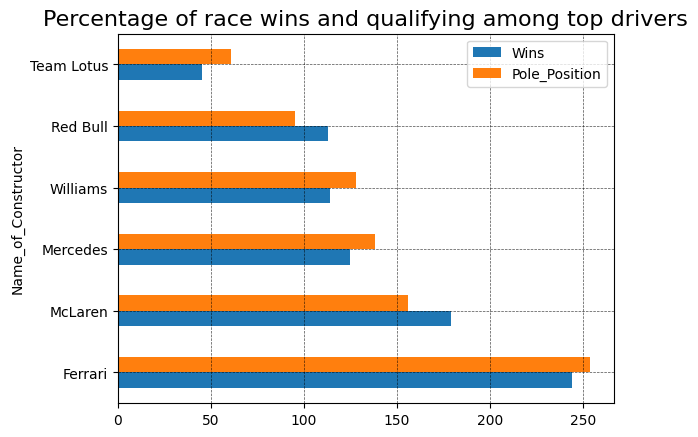

In [21]:
constructor_result = results.merge(constructor, on="Constructor_Id")\
        .groupby("Name_of_Constructor")[["Wins", "Pole_Position"]].sum().sort_values("Wins", ascending=False).head(6)

constructor_result.plot.barh()
plt.title('Percentage of race wins and qualifying among top drivers', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='black')
plt.show()